#### Forecasting sales using Prophet model

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
import itertools
from prophet import Prophet


%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\jithi\Desktop\Vinu DSA\internship\train.csv\train.csv")
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test=pd.read_csv(r"C:\Users\jithi\Desktop\Vinu DSA\internship\test.csv")
test.head()


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
df["date"].min()


'2013-01-01'

In [6]:
df["date"].max()


'2017-12-31'

In [7]:
df["store"].nunique()


10

In [8]:
df["item"].nunique() 


50

In [9]:
df.groupby(["store"])["item"].nunique()


store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

### Here I have  taken  item 1 and store 1

In [10]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d") #If need extract year, month and day to new columns:

# per 1 store, 1 item
train_df = df[df['store']==1]
train_df = train_df[df['item']==1]

# train_df = train_df.set_index('date')
#train_df['year'] = df['date'].dt.year
#train_df['month'] = df['date'].dt.month
#train_df['day'] = df['date'].dt.dayofyear
#train_df['weekday'] = df['date'].dt.weekday

train_df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


<AxesSubplot:xlabel='date', ylabel='sales'>

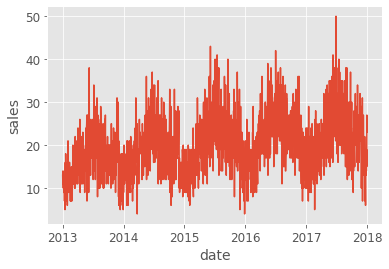

In [11]:

sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)


In [14]:
#sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df[:28])


#### Prophet requires the variable names in the time series to be:

y – Target

ds – Datetime

In [15]:
train_df = train_df.rename(columns={'date': 'ds',
                        'sales': 'y'})
train_df.head()

,ds,store,item,y
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Text(0.5, 1.0, 'sales for item 1')

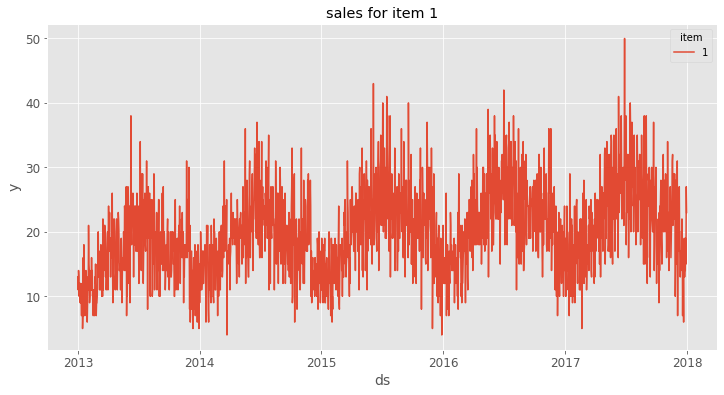

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=train_df, x="ds", y="y", hue="item")
plt.title('sales for item 1')

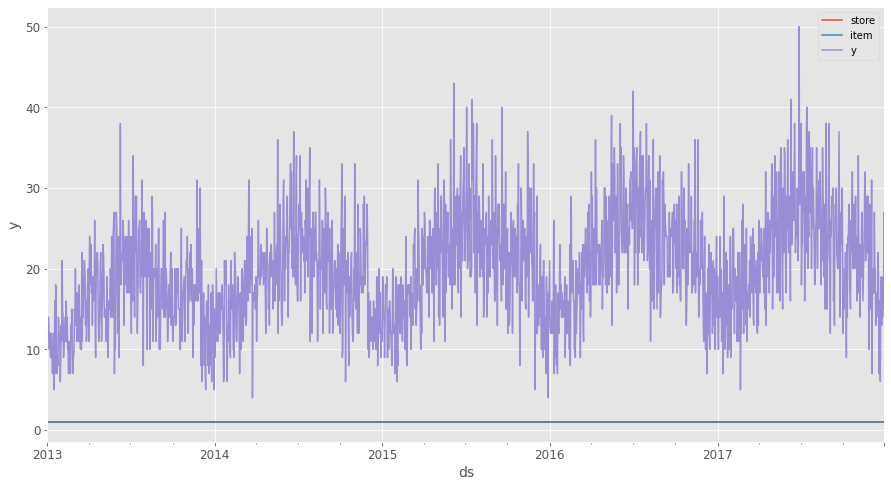

In [17]:
ax = train_df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('y')
ax.set_xlabel('ds')

plt.show()

In [18]:
my_model = Prophet(interval_width=0.95)
my_model.fit(train_df)


21:06:18 - cmdstanpy - INFO - Chain [1] start processing
21:06:18 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1857,2020-08-01
1858,2020-09-01
1859,2020-10-01
1860,2020-11-01


In [20]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1857,2020-08-01,31.822091,23.624822,40.176291
1858,2020-09-01,24.993724,16.768228,33.545400
1859,2020-10-01,23.526390,14.943031,32.437803
1860,2020-11-01,28.183746,19.542752,37.049220
1861,2020-12-01,20.492048,12.540679,29.139379


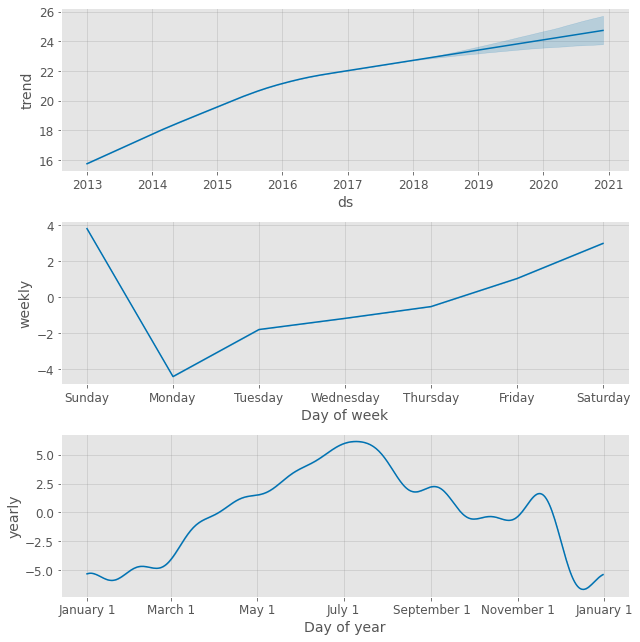

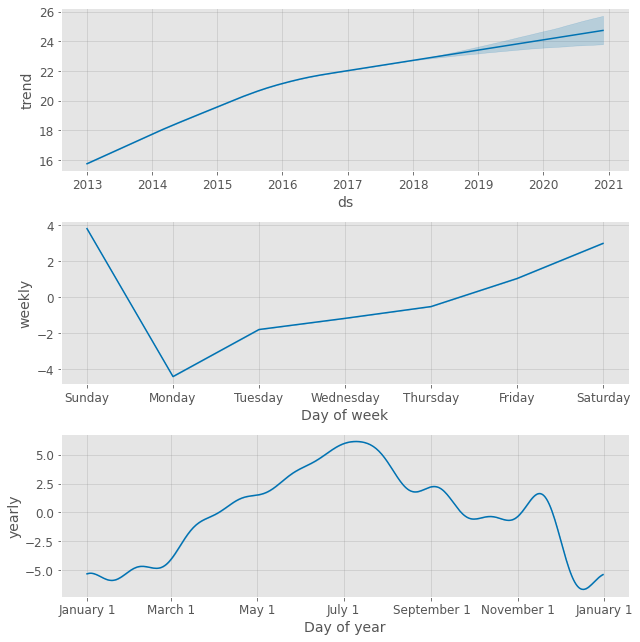

In [21]:
my_model.plot_components(forecast)


In [22]:
from prophet.diagnostics import cross_validation
train_df_cv = cross_validation(my_model, initial='730 days', period='90 days', horizon = '365 days')
train_df_cv.head()

  0%|          | 0/9 [00:00<?, ?it/s]

21:06:26 - cmdstanpy - INFO - Chain [1] start processing
21:06:27 - cmdstanpy - INFO - Chain [1] done processing
21:06:28 - cmdstanpy - INFO - Chain [1] start processing
21:06:28 - cmdstanpy - INFO - Chain [1] done processing
21:06:29 - cmdstanpy - INFO - Chain [1] start processing
21:06:29 - cmdstanpy - INFO - Chain [1] done processing
21:06:31 - cmdstanpy - INFO - Chain [1] start processing
21:06:31 - cmdstanpy - INFO - Chain [1] done processing
21:06:32 - cmdstanpy - INFO - Chain [1] start processing
21:06:32 - cmdstanpy - INFO - Chain [1] done processing
21:06:33 - cmdstanpy - INFO - Chain [1] start processing
21:06:33 - cmdstanpy - INFO - Chain [1] done processing
21:06:34 - cmdstanpy - INFO - Chain [1] start processing
21:06:34 - cmdstanpy - INFO - Chain [1] done processing
21:06:36 - cmdstanpy - INFO - Chain [1] start processing
21:06:36 - cmdstanpy - INFO - Chain [1] done processing
21:06:37 - cmdstanpy - INFO - Chain [1] start processing
21:06:37 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,11.481298,4.007565,18.875148,9,2015-01-11
1,2015-01-13,13.429155,5.573980,21.591630,9,2015-01-11
2,2015-01-14,14.310615,6.169605,22.782774,15,2015-01-11
3,2015-01-15,14.877132,6.487218,22.732357,10,2015-01-11
4,2015-01-16,16.497191,8.685395,24.186720,15,2015-01-11


In [23]:
from prophet.diagnostics import performance_metrics
train_df_p = performance_metrics(train_df_cv)
train_df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,21.858879,4.675348,3.748177,0.212146,0.145022,0.191319,0.905488
1,38 days,22.047904,4.695520,3.751146,0.213036,0.143824,0.191685,0.901084
2,39 days,22.073137,4.698206,3.763754,0.213941,0.145022,0.192322,0.899390
3,40 days,22.467109,4.739948,3.783401,0.215461,0.142870,0.193451,0.896341
4,41 days,22.503623,4.743798,3.780521,0.214490,0.142870,0.192815,0.898035


In [24]:
print('RMSE for item 1: ',round(performance_metrics(train_df_cv).rmse.mean(),2))


RMSE for item 1:  4.88


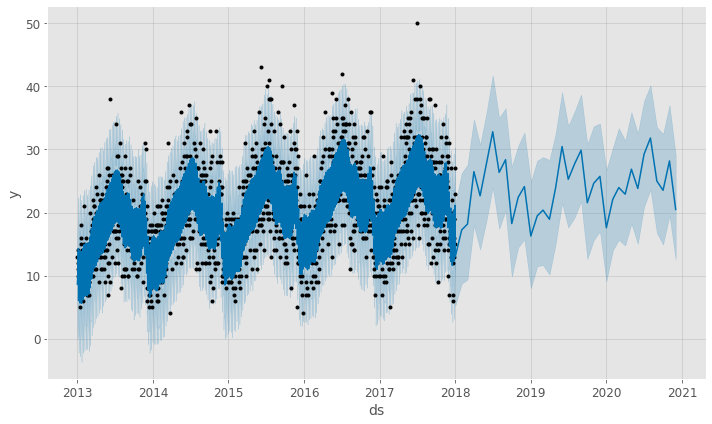

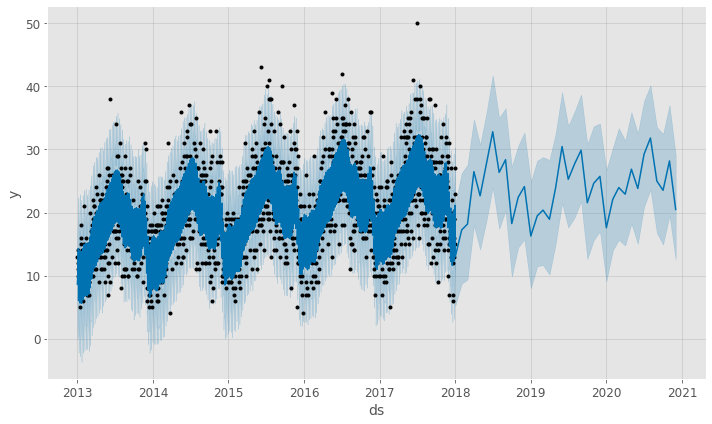

In [25]:
pd.plotting.register_matplotlib_converters()
my_model.plot(forecast, uncertainty=True)

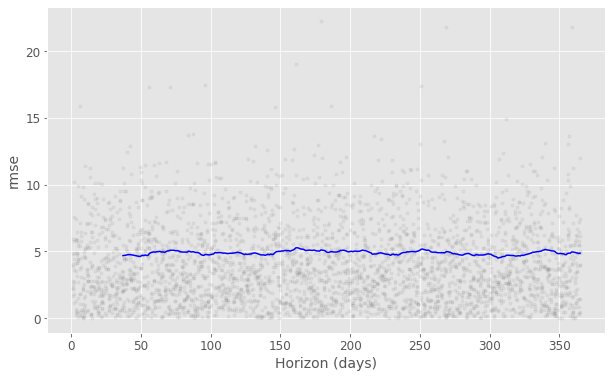

In [27]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(train_df_cv, metric='rmse')

In [28]:
df_orig = df[(df['item'] == 1) & (df['store'] == 1)]
df_orig.columns=['ds','store','item','y']
df_orig.loc[:,('ds')]=pd.to_datetime(df_orig['ds'])

In [29]:
df_forecast=forecast[['ds','yhat_lower','yhat_upper','yhat']]
df_result= pd.merge(df_orig,df_forecast,on='ds')
df_result.tail()

,ds,store,item,y,yhat_lower,yhat_upper,yhat
1821,2017-12-27,1,1,14,6.828620,24.570778,15.788778
1822,2017-12-28,1,1,19,8.254546,24.863027,16.555909
1823,2017-12-29,1,1,15,10.035133,26.852407,18.215944
1824,2017-12-30,1,1,27,11.164289,29.408697,20.257195
1825,2017-12-31,1,1,23,12.329772,30.352298,21.149800


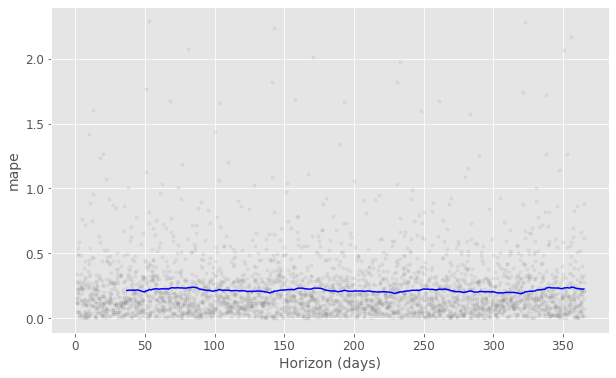

In [30]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(train_df_cv, metric='mape')

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mean_absolute_percentage_error(df_result['y'],df_result['yhat'])

20.41192658501841

In [33]:
df_result_2017= df_result[df_result['ds']>='2017-01-01']
mean_absolute_percentage_error(df_result_2017['y'],df_result_2017['yhat'])

20.1701349819745